      Iter       Train Loss   Remaining Time 
         1           1.0190           50.58s
         2           0.9192           54.25s
         3           0.8272           57.89s
         4           0.7834           55.73s
         5           0.7109           57.42s
         6           0.6368           57.82s
         7           0.5797           58.04s
         8           0.5610           56.25s
         9           0.5185           56.07s
        10           0.4984           55.12s
        20           0.1999           51.21s
        30           0.1313           47.32s
        40           0.0790           45.04s
        50           0.0511           43.00s
        60           0.0352           40.42s
        70           0.0245           38.13s
        80           0.0162           36.06s
        90           0.0114           33.97s
       100           0.0077           31.71s
       200           0.0004            9.37s
      Iter       Train Loss   Remaining Time 
        

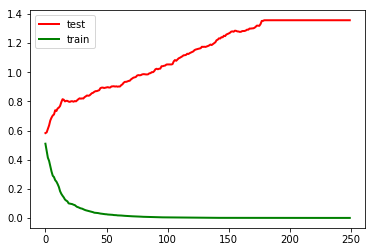

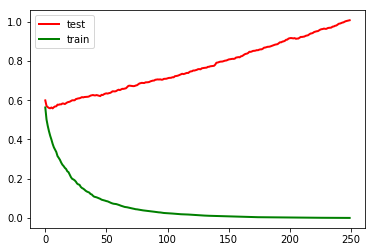

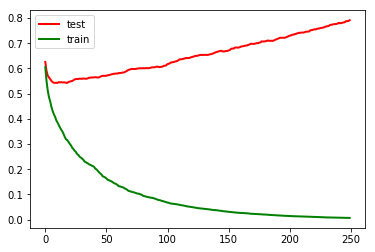

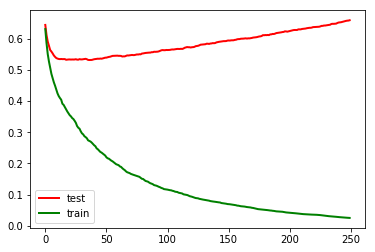

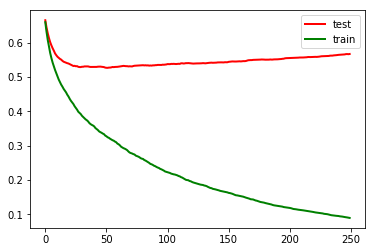

In [2]:
import pandas
import math
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
% matplotlib inline

df = pandas.read_csv('gbm-data.csv')
y = df['Activity'].values
X = df.loc[:, 'D1':'D1776'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

def sigmoid(y_pred):
    # Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}),
    # где y_pred — предсказаное значение.
    return 1.0 / (1.0 + math.exp(-y_pred))


def log_loss_results(model, X, y):
    # Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке
    # на каждой итерации.
    results = []
    for pred in model.staged_decision_function(X):
        results.append(log_loss(y, [sigmoid(y_pred) for y_pred in pred]))

    return results


def plot_loss(learning_rate, test_loss, train_loss):
    # Вычислите и постройте график значений log-loss (которую можно посчитать с помощью функции
    # sklearn.metrics.log_loss) на обучающей и тестовой выборках, а также найдите минимальное значение метрики и
    # номер итерации, на которой оно достигается.
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    plt.savefig('plots/rate_' + str(learning_rate) + '.png')

    min_loss_value = min(test_loss)
    min_loss_index = test_loss.index(min_loss_value)
    return min_loss_value, min_loss_index


def model_test(learning_rate):
    model = GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=250, verbose=True, random_state=241)
    model.fit(X_train, y_train)

    train_loss = log_loss_results(model, X_train, y_train)
    test_loss = log_loss_results(model, X_test, y_test)
    return plot_loss(learning_rate, test_loss, train_loss)

min_loss_results = {}
for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
    min_loss_results[learning_rate] = model_test(learning_rate)

# 3. Как можно охарактеризовать график качества на тестовой выборке, начиная с некоторой итерации:переобучение
# (overfitting) или недообучение (underfitting)? В ответе укажите одно из слов overfitting либо underfitting.

print('overfitting')

# 4. Приведите минимальное значение log-loss и номер итерации, на котором оно достигается, при learning_rate = 0.2.

min_loss_value, min_loss_index = min_loss_results[0.2]
print('{:0.2f} {}'.format(min_loss_value, min_loss_index))

# 5. На этих же данных обучите RandomForestClassifier с количеством деревьев, равным количеству итераций, на котором
# достигается наилучшее качество у градиентного бустинга из предыдущего пункта, c random_state=241 и остальными
# параметрами по умолчанию. Какое значение log-loss на тесте получается у этого случайного леса? (Не забывайте, что
# предсказания нужно получать с помощью функции predict_proba)

model = RandomForestClassifier(n_estimators=min_loss_index, random_state=241)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
test_loss = log_loss(y_test, y_pred)
print(test_loss)